<a href="https://colab.research.google.com/github/lefdez/Exploratory-Data-Analysis-and-Logistic-Regression-of-Titanic-Dataset/blob/main/Exploratory_Data_Analysis_and_Logistic_Regression_of_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install cufflinks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.8 MB/s eta 0:00:00


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [83]:
train_data = pd.read_csv('sample_data/train.csv')
test_data = pd.read_csv('sample_data/test.csv')

In [84]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


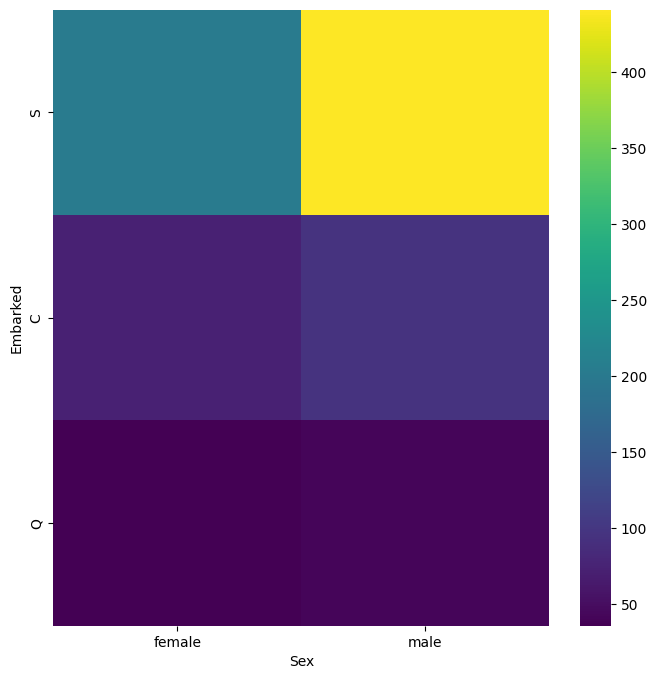

In [85]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Embarked'].value_counts()
    for x_label, grp in train_data.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('Embarked')

<Axes: xlabel='Survived', ylabel='count'>

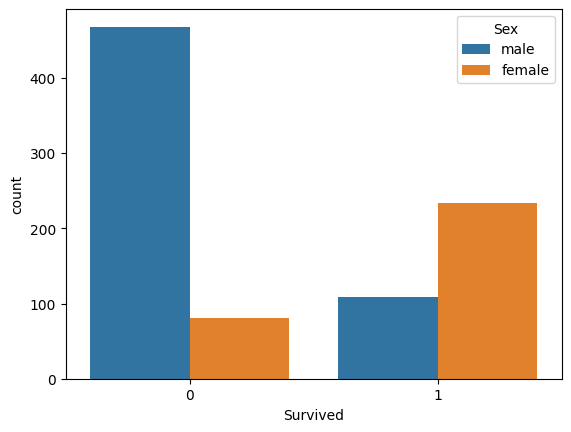

In [86]:
sns.countplot(x='Survived', hue='Sex', data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

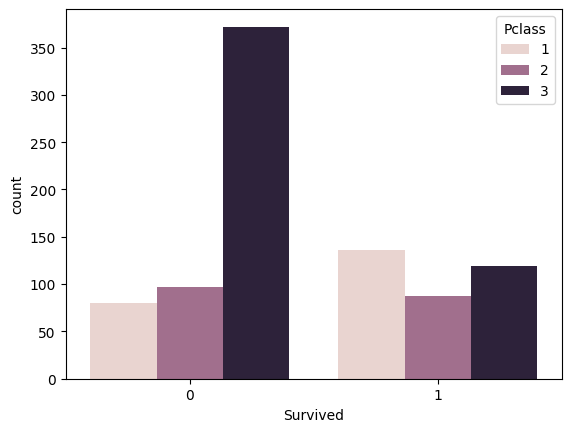

In [87]:
sns.countplot(x='Survived', data=train_data, hue='Pclass')

In [88]:
cf.go_offline()


In [89]:
train_data['Fare'].iplot(kind='hist',bins=40)

<Axes: >

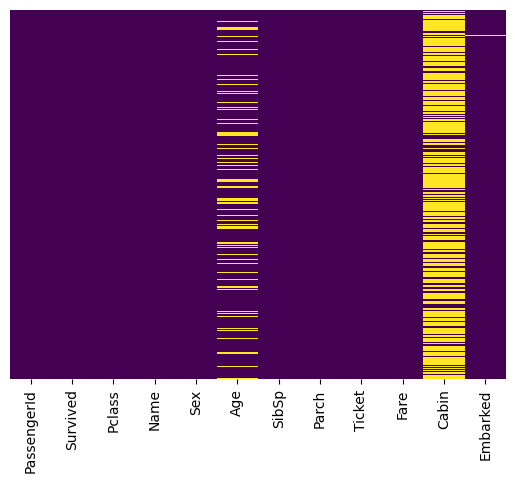

In [90]:
#Clear data
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Pclass', ylabel='Age'>

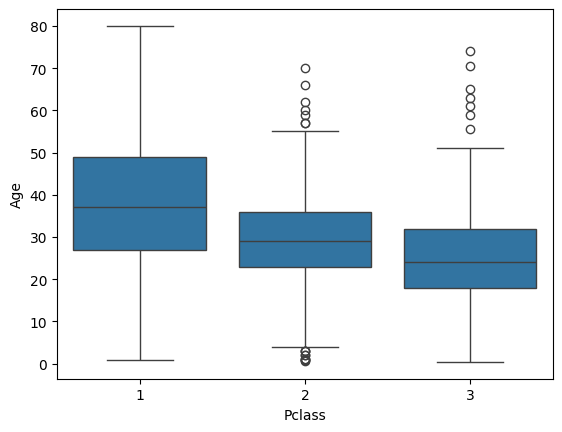

In [91]:
sns.boxplot(x='Pclass', y='Age', data=train_data)

In [92]:
#Funcion para insertar la edad media en cada clase de pasajero
def age_impute(data):
    Age , Pclass = data[['Age','Pclass']]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


In [93]:
train_data['Age'] = train_data.apply(age_impute, axis=1)

<Axes: >

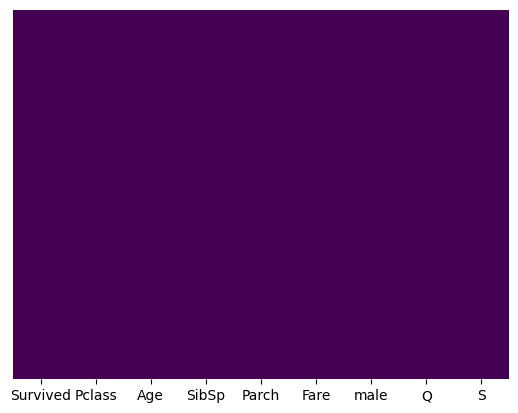

In [119]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [118]:
train_data.drop('Cabin', axis=1, inplace=True)

In [120]:
train_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

KeyError: "['Name', 'Ticket', 'PassengerId'] not found in axis"

In [121]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [95]:
sex_male = pd.get_dummies(train_data['Sex'])
sex_male.drop('female', axis=1, inplace=True)
sex_male.head()

,male
0,True
1,False
2,False
3,False
4,True


In [96]:
train_data = pd.concat([train_data, sex_male], axis=1)

In [97]:
train_data.drop('Sex', axis=1, inplace=True)

In [98]:
embarked = pd.get_dummies(train_data['Embarked'], drop_first=True)
embarked.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [99]:
train_data = pd.concat([train_data, embarked], axis=1)

In [100]:
train_data.drop('Embarked', axis=1, inplace=True)

In [122]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [123]:
#Train Model
y_data = train_data['Survived']
X_data = train_data.drop('Survived', axis=1)

#Test data
X_test = test_data

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=27)

In [128]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
129,3,45.0,0,0,6.9750,True,False,True
515,1,47.0,0,0,34.0208,True,False,True
148,2,36.5,0,2,26.0000,True,False,True
345,2,24.0,0,0,13.0000,False,False,True
458,2,50.0,0,0,10.5000,False,False,True
...,...,...,...,...,...,...,...,...
824,3,2.0,4,1,39.6875,True,False,True
543,2,32.0,1,0,26.0000,True,False,True
840,3,20.0,0,0,7.9250,True,False,True
696,3,44.0,0,0,8.0500,True,False,True


In [129]:
titanic_model = LogisticRegression()
titanic_model.fit(X_train, y_train)

LogisticRegression()

In [130]:
predic = titanic_model.predict(X_test)

In [133]:
print(classification_report(y_test, predic))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       112
           1       0.78      0.73      0.75        67

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [134]:
confusion_matrix(y_test, predic)

array([[98, 14],
       [18, 49]])